<h2 style='color:Green' align='center'>World Leader Image Classification<h2>

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

### Data collection was automated using a chrome extrension (Fatkun Batch Download Image). I created folders of photographs from 5 world leaders generated from google images search.

# Data Pre-Processing

### I used eye recognition code to detect the face in the images

In [2]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [3]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                            return roi_color

### Next, I create folders to send the new, cropped images, cropped around the faces in the original images

In [4]:
path_to_data = "./dataset2/"
path_to_cr_data = "./dataset2/cropped/"

In [5]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [6]:
img_dirs

['./dataset2/angela merkel - Google Search',
 './dataset2/xi jinping - Google Search',
 './dataset2/joe biden - Google Search',
 './dataset2/cropped',
 './dataset2/donald trump - Google Search',
 './dataset2/vladimir putin - Google Search']

In [7]:
    '''
Run this code only when creating cropped images for the first time, otherwise this will overwrite
the next steps of manually removing unusable images
    '''
#import shutil
#if os.path.exists(path_to_cr_data):
#     shutil.rmtree(path_to_cr_data)
#os.mkdir(path_to_cr_data)

'\nRun this code only when creating cropped images for the first time, otherwise this will overwrite\nthe next steps of manually removing unusable images\n'

In [8]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  


angela merkel - Google Search
xi jinping - Google Search
joe biden - Google Search
cropped
donald trump - Google Search
vladimir putin - Google Search


In [9]:
import pywt



def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

# Now, I check to make sure the cropped images are uesable and remove unsuitable images

In [10]:
original_image = cv2.imread('./dataset2/angela merkel - Google Search/angela merkel - Google Search1.png')

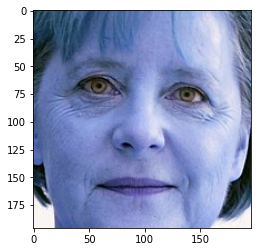

In [11]:
cropped_image = get_cropped_image_if_2_eyes('./dataset2/cropped/angela merkel - Google Search/angela merkel - Google Search1.png')
plt.imshow(cropped_image)

# Now, I use raw images and add wavelet transformed images to train the model

In [12]:
import pywt



def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [13]:
del celebrity_file_names_dict['cropped']
class_dict = {}

count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count+=1
class_dict


{'angela merkel - Google Search': 0,
 'xi jinping - Google Search': 1,
 'joe biden - Google Search': 2,
 'donald trump - Google Search': 3,
 'vladimir putin - Google Search': 4}

In [14]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [15]:
len(X[0])

4096

In [16]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(202, 4096)

In [17]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


# Time to train the model now that data collection, cleaning, and pre-processing has been completed. I created 3 ML models (linear regression, SVC, and random forest), compared their accuracy, and hypertuned the best of the 3 models to create a final model.

We will test out a SVM and Random Forest

In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test, y_test)

0.7843137254901961

In [20]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.67      0.86      0.75         7
           2       1.00      0.62      0.76        13
           3       0.00      0.00      0.00         2
           4       0.61      1.00      0.76        11

    accuracy                           0.78        51
   macro avg       0.66      0.66      0.64        51
weighted avg       0.83      0.78      0.78        51



In [21]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [22]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [23]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.767957,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.655914,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.795054,{'logisticregression__C': 1}


In [24]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [25]:
best_estimators['svm'].score(X_test,y_test)
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [26]:
best_estimators['random_forest'].score(X_test,y_test)

0.7450980392156863

In [27]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7450980392156863

In [28]:
best_clf = best_estimators['svm']

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[15,  2,  0,  0,  1],
       [ 0,  6,  0,  0,  1],
       [ 0,  0, 11,  1,  1],
       [ 0,  0,  0,  0,  2],
       [ 0,  0,  2,  1,  8]])

Text(69.0, 0.5, 'Truth')

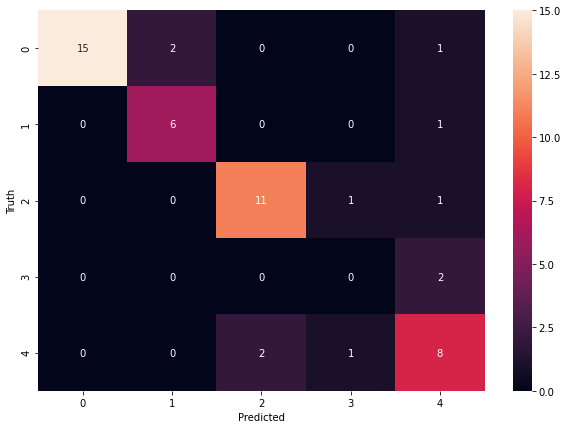

In [30]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Testing the model and predicting the class of new test data (new images scraped from the web)

In [31]:
import joblib
import json
import numpy as np
import base64
import cv2
import pandas as pd

### Lets import a test image and its base64 string and test our model with it

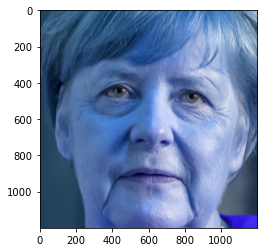

In [32]:
test_image = get_cropped_image_if_2_eyes('./angela_test.jpeg')
plt.imshow(test_image)

In [33]:
__class_name_to_number = {}
__class_number_to_name = {}

__model = best_clf



def classify_image(image_base64_data, file_path=None):

    imgs = get_cropped_image_if_2_eyes("./angela_test.jpeg", "./b_64.txt")
    global result
    result = []
    for img in imgs:
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))

        len_image_array = 32*32*3 + 32*32

        final = combined_img.reshape(1,len_image_array).astype(float)
        result.append({
            'class': class_number_to_name(__model.predict(final)[0]),
            'class_probability': np.around(__model.predict_proba(final)*100,2).tolist()[0],
            'class_dictionary': __class_name_to_number
        })
    print(result[0])
    return result



def class_number_to_name(class_num):
    return __class_number_to_name[class_num]


def load_saved_artifacts():

    global __class_name_to_number
    global __class_number_to_name

    with open("./artifacts/class_dictionary.json", "r") as f:
        __class_name_to_number = json.load(f)
        __class_number_to_name = {v:k for k,v in __class_name_to_number.items()}

    global __model
    if __model is None:
        __model = best_clf




def get_cv2_image_from_base64_string(b64str):
    '''
    credit: https://stackoverflow.com/questions/33754935/read-a-base-64-encoded-image-from-memory-using-opencv-python-library

    '''
    encoded_data = b64str.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

def get_cropped_image_if_2_eyes(image_path, image_base64_data):
    face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

    if image_path:
        img = cv2.imread(image_path)
    else:
        img = get_cv2_image_from_base64_string(image_base64_data)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    cropped_faces = []
    for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                cropped_faces.append(roi_color)
    return cropped_faces

def get_b64_test_image_of_angela_merkel():
    with open("b_64.txt") as f:
        return f.read()



    
if __name__ == '__main__':
    load_saved_artifacts()

    classify_image("./b_64.txt")

    print("Predicted class = "+result[0]['class']+"\n Probability "+str(result[0]['class_probability'][0]))

    data = [['Angela Merkel',str(result[0]['class_probability'][0])],
            ['Xi Jinping',str(result[0]['class_probability'][1])],
            ['Joe Biden',str(result[0]['class_probability'][2])],
            ['Donald Trump',str(result[0]['class_probability'][3])],
            ['Vladimir Putin',str(result[0]['class_probability'][4])]]  
    df = pd.DataFrame(data, columns=["Names","Probability"])
    print(df)

{'class': 'angela_merkel', 'class_probability': [70.98, 1.65, 8.13, 18.57, 0.67], 'class_dictionary': {'angela_merkel': 0, 'xi_jinping': 1, 'joe_biden': 2, 'donald_trump': 3, 'vladimir_putin': 4}}
Predicted class = angela_merkel
 Probability 70.98
            Names Probability
0   Angela Merkel       70.98
1      Xi Jinping        1.65
2       Joe Biden        8.13
3    Donald Trump       18.57
4  Vladimir Putin        0.67


# The model is complete and has been tested. Further testing is completed by passing in any combination of .png or .jpeg image with its base64 string loaded into a .txt file

## We have successfully created our model and tested it with real world test data (image from google images). In this case, our model correctly predicted the World Leader of the image being Angela Merkel and assigns the image the probability of it belonging to each class.